In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv" # covid case source data


state = 'Florida'
county = 'Hillsborough'
county_population = 1471968



# note, use at your own risk
#i have no credentials that make me the one to calc or report this info

In [2]:
df = pd.read_csv(url) # read in the csv from the NYT

In [3]:
df # ensure that worked

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
823150,2020-12-12,Sweetwater,Wyoming,56037.0,2384,14.0
823151,2020-12-12,Teton,Wyoming,56039.0,1886,2.0
823152,2020-12-12,Uinta,Wyoming,56041.0,1289,7.0
823153,2020-12-12,Washakie,Wyoming,56043.0,628,11.0


In [4]:
df = df.iloc[12500:] # clear out the early data with little relevance for target county

In [5]:
df_state = df.loc[df['state'] == state] # filter down to just Florida
df_county  = df_state.loc[df['county'] == county] # filter down to just target County

In [6]:
# the dataset has cumulative cases
# we want daily new cases, so create real_cases with just the daily number
df_county = df_county.assign(real_cases = df_county.loc[:,'cases'].diff())



In [7]:
# to get active cases, we need to make an assumption for how long a person is infected
# for this, 2 weeks was assumed the infected period
# so, a rolling 2 week sum will provide something like an active case count


df_county = df_county.assign(two_wk_case_sum = df_county.loc[:,'real_cases'].rolling(window = 14).sum())

In [8]:
# add in the population of the county 

df_county = df_county.assign(pop = county_population)

In [9]:
# create a case rate field

df_county = df_county.assign(case_rate = df_county['two_wk_case_sum']/df_county['pop']) 

In [10]:
# percentages can by difficult for people to really conceptualize
# here, a field is created to describe the odds instead i.e. 1 in every 150 people are currently infected

df_county = df_county.assign(case_odds = (1/df_county['case_rate']).round())

In [11]:
df_county.tail() #how's it look?

,date,county,state,fips,cases,deaths,real_cases,two_wk_case_sum,pop,case_rate,case_odds
807277,2020-12-08,Hillsborough,Florida,12057.0,62149,969.0,550.0,5983.0,1471968,0.004065,246.0
810522,2020-12-09,Hillsborough,Florida,12057.0,62439,972.0,290.0,5942.0,1471968,0.004037,248.0
813766,2020-12-10,Hillsborough,Florida,12057.0,63339,977.0,900.0,6842.0,1471968,0.004648,215.0
817012,2020-12-11,Hillsborough,Florida,12057.0,64281,984.0,942.0,6910.0,1471968,0.004694,213.0
820258,2020-12-12,Hillsborough,Florida,12057.0,64999,985.0,718.0,7271.0,1471968,0.004940,202.0


In [12]:
# slim down the set to start 6/1 and just date and case odds fields

covid_odds_plot = df_county.iloc[67:,:].loc[:,['date','case_rate','case_odds']]



In [13]:
covid_odds_plot

,date,case_rate,case_odds
197185,2020-06-01,0.000406,2461.0
200258,2020-06-02,0.000418,2393.0
203334,2020-06-03,0.000463,2161.0
206414,2020-06-04,0.000484,2067.0
209496,2020-06-05,0.000519,1927.0
...,...,...,...
807277,2020-12-08,0.004065,246.0
810522,2020-12-09,0.004037,248.0
813766,2020-12-10,0.004648,215.0
817012,2020-12-11,0.004694,213.0


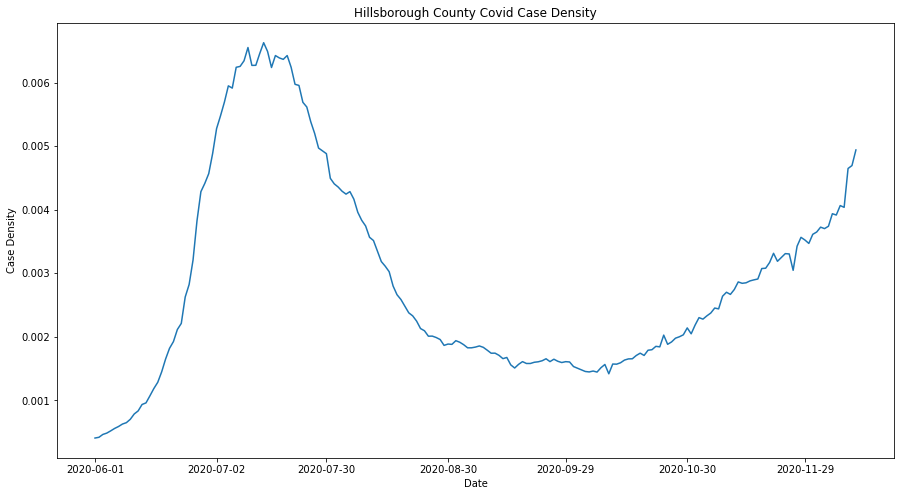

In [14]:
# Plot
x = covid_odds_plot.loc[:,'date']
y = covid_odds_plot.loc[:,'case_rate']

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, y)


ax.set(xlabel='Date', ylabel='Case Density',
       title= 'Hillsborough County Covid Case Density')

# ax.locator_params(nbins=100, axis='x')
# plt.locator_params(axis='x', nbins=6)
# ax.grid()
# ax.xaxis.set_major_locator(ticker.MaxNLocator(4))
# ax.xaxis.set_major_locator(ticker.LinearLocator(3))

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_minor_locator(months)

# datemin = np.datetime64(covid_odds_plot['date'][0], 'Y')
# datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
# ax.set_xlim(datemin, datemax)

fig.savefig("test.png")
plt.show()


In [15]:
# define some key statistics

data_current_through = covid_odds_plot.date.max()
worst_odds = covid_odds_plot.case_odds.min()
worst_odds_date = 'a'
current_odds = covid_odds_plot['case_odds'].iloc[-1]

In [18]:
# start laying out the story

print(county,', ',state,' summary through ',data_current_through)
print()
print('Worst odds so far were 1 in ',worst_odds,' people infected')
print('The current odds are 1 in ',current_odds)


Hillsborough ,  Florida  summary through  2020-12-12

Worst odds so far were 1 in  151.0  people infected
The current odds are 1 in  202.0
